In [4]:
from collections import Counter
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os


/Users/apple/Documents/vision-projects/1


In [7]:
pwd=os.getcwd()
img_path = pwd+ "/data/Images/Original Images/img_001.jpg"
img = cv2.imread(img_path, 1)

blue, green, red = cv2.split(img)

In [8]:
# Convert BGR image into RGB 
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def normalize(seq, input_start, input_end, output_start, output_end):
    factor = (output_end - output_start) / (input_end - input_start)
    return (output_start + factor * (seq - input_start)).astype(np.uint8)    

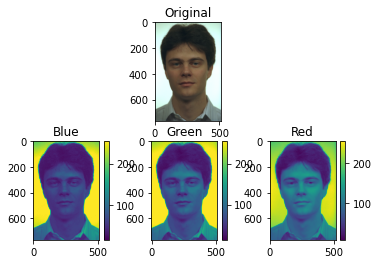

In [14]:
layout = (2, 3)
plt.subplot2grid(layout, (0, 1), colspan=1)
plt.imshow(bgr2rgb(img)), plt.title("Original")
plt.subplot2grid(layout, (1, 0))
plt.imshow(blue), plt.title("Blue")
plt.colorbar()
plt.subplot2grid(layout, (1, 1))
plt.imshow(green), plt.title("Green")
plt.colorbar()
plt.subplot2grid(layout, (1, 2))
plt.imshow(red), plt.title("Red")
plt.colorbar()
plt.savefig("T1-Plots/RGB_Plots.png")
plt.show()

In [11]:
# Convert BGR image into HSV 
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Split HSV  into its channels
h, s, v = cv2.split(hsv_img)

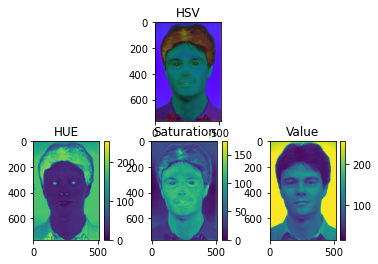

In [15]:
# Map Hue to range (0, 255)
h = normalize(h, 0, 179, 0, 255)

layout = (2, 3)
plt.subplot2grid(layout, (0, 1), colspan=1)
plt.imshow(hsv_img), plt.title("HSV")
plt.subplot2grid(layout, (1, 0))
plt.imshow(h), plt.title("HUE")
plt.colorbar()
plt.subplot2grid(layout, (1, 1))
plt.imshow(s), plt.title("Saturation")
plt.colorbar()
plt.subplot2grid(layout, (1, 2))
plt.imshow(v), plt.title("Value")
plt.colorbar()
plt.savefig("T1-Plots/HSV_Plots.png")
plt.show()

In [25]:
def find_bin(num, bins):
    n_bins = len(bins) - 1
    for i in range(n_bins):
        if (num >= bins[i]) and (num < bins[i + 1]):
            return i

    return None


def bin_numbers(seq, bins):
    binnumbers = []
    for num in seq:
        bin_number = find_bin(num, bins)
        binnumbers.append(bin_number)

    return np.array(binnumbers)

def histogram(seq, n_bins=256, range=(0, 256)):
    bins = np.linspace(range[0], range[1], n_bins + 1)
    
    #Find indices where elements should be inserted to maintain order.
    bin_indices = np.searchsorted(bins, seq, side='left')
    hist = np.bincount(bin_indices, minlength=n_bins)

    # Return x axis  and height values to plot 
    return hist, bins


def counter(seq):
    z = Counter(seq.tolist())
    hist = np.zeros(256)
    for el in z:
        hist[el] = z[el]

    bins = np.arange(0, 256)

    return hist, bins

images = {
    'RED': red,
    'GREEN': green,
    'BLUE': blue,
    'HUE': h,
    'SATURATION': s,
    'Value': v
}


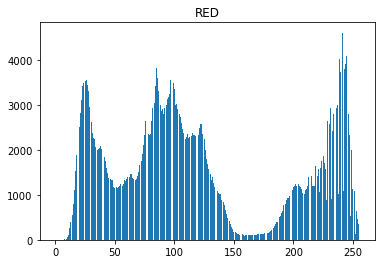

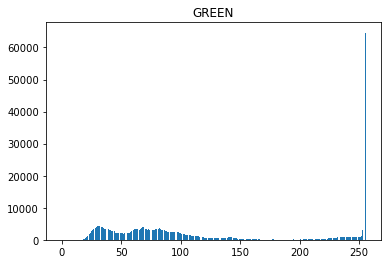

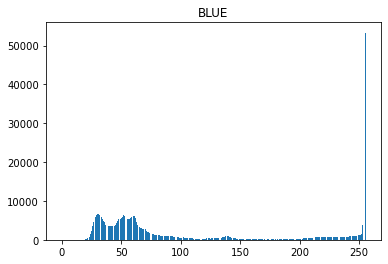

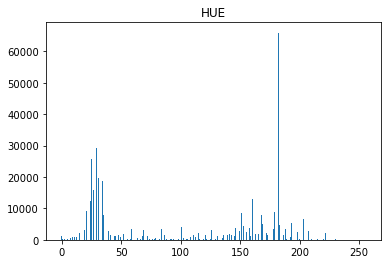

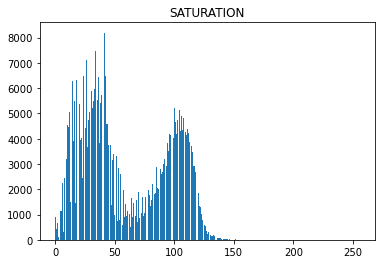

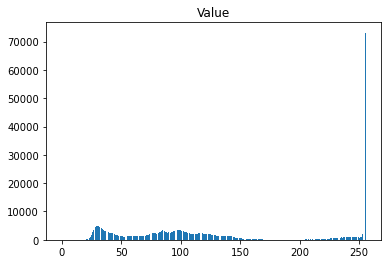

In [27]:
for title in images:
    hist_m, bins_m = histogram(images[title].ravel(), 256, [0, 256])
    plt.title(title) # + " mine")
    plt.bar(bins_m[:-1], height=hist_m)
    plt.savefig("T1-Plots/histogram_{}".format(title))
    plt.show()
    hist, bins = np.histogram(images[title].ravel(), 256, [0, 256])
    assert np.equal(hist, hist_m).all(), "My histogram function is not equal to numpy histogram"

    hist_b = np.bincount(images[title].flatten(), minlength=256)
    assert np.equal(hist, hist_b).all(), "My histogram function is not equal to bincount"
